In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from: https://github.com/PyImageSearch/imutils/blob/master/imutils/convenience.py
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

In [4]:
image = cv2.imread("../dataset/samples/1101062028003_003_p1.jpg")
resized = resize(image, width=500)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

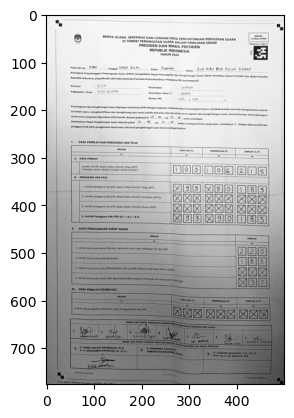

In [7]:
plt.imshow(gray, cmap='gray')

## Laplacian Blur

In [8]:
laplacian_blur = cv2.Laplacian(gray, cv2.CV_64F).var()
print("Laplacian =", laplacian_blur)

Laplacian = 2543.2402035359164


## FFT Blur

In [12]:
size = 60
(h, w) = gray.shape
(cX, cY) = (w // 2, h // 2)

fft = np.fft.fft2(gray)
fftShift = np.fft.fftshift(fft)

fftShift[cY - size:cY + size, cX - size:cX + size] = 0
fftShift = np.fft.ifftshift(fftShift)
recon = np.fft.ifft2(fftShift)

magnitude = 20 * np.log(np.abs(recon))
fft_blur = np.mean(magnitude)
print("FFT =", fft_blur)

FFT = 35.410189255814444


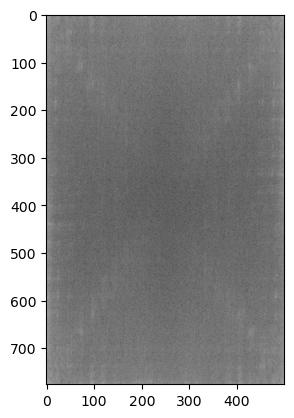

In [40]:
plt.imshow(np.log(np.abs(fft)), cmap='gray')

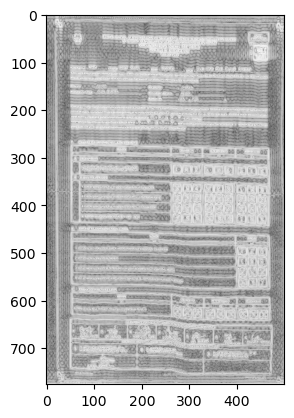

In [13]:
plt.imshow(magnitude, cmap='gray')